In [24]:
import pandas as pd
df = pd.read_csv("kion10y.csv", encoding="utf-8")

In [25]:
# md为空的dictionary
md = {}
for i, row in df.iterrows(): # iterrows is a generator which yields both the index and row (as a Series)
    m, d, v = (int(row["month"]), int(row["day"]), float(row["temp"]))
    key = str(m) + "/" + str(d) # key的形式为“month/day”
    if not (key in md):
        md[key] = []
    md[key] += [v]

In [20]:
# 求日平均
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0}:{1}".format(key, v))

1/1:6.009090909090909
1/2:6.136363636363637
1/3:5.7727272727272725
1/4:5.909090909090909
1/5:5.927272727272728
1/6:5.718181818181818
1/7:5.6090909090909085
1/8:5.454545454545454
1/9:6.9
1/10:5.990909090909091
1/11:5.627272727272726
1/12:4.818181818181818
1/13:6.127272727272728
1/14:5.6909090909090905
1/15:5.281818181818181
1/16:6.281818181818182
1/17:5.890909090909091
1/18:5.072727272727271
1/19:5.681818181818182
1/20:5.463636363636363
1/21:5.472727272727273
1/22:5.254545454545454
1/23:5.4818181818181815
1/24:5.236363636363636
1/25:5.027272727272727
1/26:5.154545454545455
1/27:6.136363636363637
1/28:5.718181818181819
1/29:6.3090909090909095
1/30:6.254545454545454
1/31:5.872727272727272
2/1:5.918181818181819
2/2:7.036363636363635
2/3:7.172727272727273
2/4:7.136363636363637
2/5:5.854545454545455
2/6:5.254545454545454
2/7:6.118181818181818
2/8:5.0636363636363635
2/9:4.254545454545455
2/10:4.627272727272728
2/11:5.754545454545454
2/12:6.445454545454546
2/13:7.209090909090909
2/14:7.5
2/15:

In [21]:
print(avs["12/7"])

9.181818181818182


In [29]:
# 求月平均
# method1，iterrows（）效率低下
md = {}

for i, row in df.iterrows():
    m, v = (int(row["month"]), float(row["temp"]))
    key = str(m)
    if not (key in md):
        md[key] = []
    md[key] += [v]

In [30]:
avs_m = {}
for key in md:
    v = avs_m[key] = sum(md[key]) / len(md[key])
    print("{0}:{1}".format(key, v))

1:5.718768328445748
2:6.719032258064517
3:10.978885630498526
4:14.990000000000002
5:19.81906158357772
6:22.62787878787879
7:26.5131964809384
8:27.885923753665697
9:23.97393939393938
10:18.46715542521995
11:13.50727272727273
12:8.10703812316716


In [38]:
# 求月平均
# method2，相较method1效率更高
import matplotlib.pyplot as plt

In [39]:
# 计算每月平均气温
g = df.groupby(["month"])["temp"] # 利用month对temp进行分组
gg = g.sum() / g.count() # 对组内进行求和平均

month
1      5.718768
2      6.719032
3     10.978886
4     14.990000
5     19.819062
6     22.627879
7     26.513196
8     27.885924
9     23.973939
10    18.467155
11    13.507273
12     8.107038
Name: temp, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

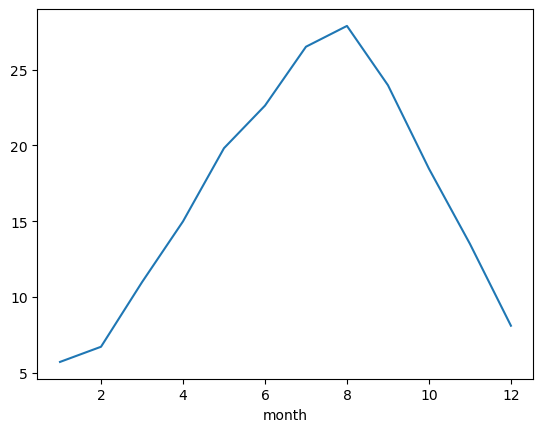

In [40]:
# 输出结果
print(gg)
gg.plot()
plt.savefig("month_temp_avg.png")
plt.show